In [20]:
import zipfile

import matplotlib.pyplot as plt

from hda import Client

import rasterio
from rasterio.windows import Window
from rasterio.plot import show

%run helpers.ipynb

# 1. Get Data

In [10]:
data = {
    "datasetId": "EO:CLMS:DAT:CORINE",
    "stringChoiceValues": [
        {
            "name": "product_type",
            "value": "Corine Land Cover 2018"
        },
        {
            "name": "format",
            "value": "GeoTiff100mt"
        }
    ]
}

In [ ]:
c = Client(debug=False)

matches = c.search(data)
matches.download()

2022-07-12 15:21:00,862 ERROR Download incomplete, downloaded 3269459968 byte(s) out of 3755307202
2022-07-12 15:21:00,862 WARNING Sleeping 22.5 seconds
2022-07-12 15:21:23,376 WARNING Resuming download at byte 3269459968
2022-07-12 15:21:27,522 DEBUG https://wekeo-broker.apps.mercator.dpi.wekeo.eu:443 "GET /databroker/dataorder/download/NZX7LbtFsCaVFlI0MoH8ZtGkyxo HTTP/1.1" 200 None
2022-07-12 15:21:27,522 DEBUG Headers: {'Server': 'nginx', 'Date': 'Tue, 12 Jul 2022 13:21:27 GMT', 'Content-Type': 'application/zip', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Authorization,Origin', 'Content-Disposition': 'attachment; filename=u2018_clc2018_v2020_20u1_geoPackage.zip', 'Access-Control-Allow-Origin': '*'}
2022-07-12 15:23:12,292 WARNING Oops, downloaded 4359421952 byte(s), was supposed to be 3755307202 (extra 604114750)
2022-07-12 15:23:12,292 INFO Download rate 6.9M/s


In [3]:
zip_ref = zipfile.ZipFile("u2018_clc2018_v2020_20u1_raster100m.zip")
zip_ref.extractall("./data")
zip_ref.close() # close file

# 2. Set Path

In [3]:
tif_path = 'data/u2018_clc2018_v2020_20u1_raster100m/DATA/U2018_CLC2018_V2020_20u1.tif'

## 2.1 Work with Rasterio

In [4]:
dataset = rasterio.open(tif_path)

In [5]:
# show data information
print("Count:",dataset.count)
print()
print("CRS:", dataset.crs)
print()
print("Width:", dataset.width, "Height", dataset.height)

Count: 1

CRS: PROJCS["ETRS_1989_LAEA",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3035"]]

Width: 65000 Height 46000


In [5]:
# show complete data
show(dataset)

MemoryError: Unable to allocate 2.78 GiB for an array with shape (1, 46000, 65000) and data type int8

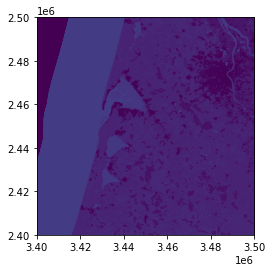

<AxesSubplot:>

In [19]:
# show specific region data

# X coordinate, Y coordinate, Width, height
window = Window(25000, 30000, 1000, 1000)

data_cropped = dataset.read(window=window, masked=True)
show(data_cropped, transform=dataset.window_transform(window), vmin=0, vmax=255)

# 3. Work with data